In [6]:
# 포털 사이트마다 크롤링 코드가 다르기 때문에 클래스 안에 함수 별로 나누기.
class Search:    
    def __init__(self, keywords):
        self.query = keywords + ' 여행' # 지역명 + 여행 으로 키워드가 들어가야 함.
        self.keywords = keywords        # 키워드는 따로 살려놓기
    
    
    def naver_blog(self, page):
        import requests
        import time
        import json, os
        import urllib.request
        import matplotlib
        import matplotlib.pyplot as plt
        import nltk
        from nltk.corpus import stopwords
        from konlpy.tag import Twitter
        from collections import Counter
        from wordcloud import WordCloud
        from IPython.display import set_matplotlib_formats
        from bs4 import BeautifulSoup
        from selenium import webdriver
        
        %matplotlib inline
        matplotlib.rc('font', family = 'Malgun Gothic')
        set_matplotlib_formats('retina')
        matplotlib.rc('axes', unicode_minus = False)
        twitter = Twitter()

        with open('D:/SBA/filtering.txt', 'r') as f:    # 워드클라우드에서 필요없는 단어 등을 메모장에 쓰고 필터링
            lines = f.readlines()                       # 줄을 바꾸면서 읽어들이기
            lines = [_.strip('\n') for _ in lines]      # 줄 바꿈을 제외하고 단어를 넣기

        driver = webdriver.Chrome()
        driver.get(f"https://section.blog.naver.com/Search/Post.nhn?pageNo=1\
                   &rangeType=ALL&orderBy=sim&keyword={self.query}") # 네이버 블로그에서 키워드 검색을 통해 열기
        
        total = []
        try:
            for i in range(page):  # page 얼마나 크롤링 할 지 설정
                for j in range(7): # 7로 한 이유 : 블로그 페이지 게시글이 1페이지 당 7개 있음.
                    
                    # 게시글 들어가기
                    driver.find_elements_by_css_selector(f"div.area_list_search > div:nth-child({j+1}) > div > div.info_post > div > a")[0].click()
                    
                    # 새로운 탭으로 커서 변경
                    driver.switch_to.window(driver.window_handles[-1])
                    
                    # iframe 안으로 들어가기
                    driver.switch_to.frame("mainFrame")
                    
                    # 현재 페이지 안의 페이지 소스 가져오기
                    dom = BeautifulSoup(driver.page_source, "lxml")
                    
                    # span 태그 안에 있는 데이터 가져오기
                    word_list = dom.select(".se-main-container .se-text span")
                    
                    # \u200b 를 제외하고 텍스트를 가져오기
                    word_list = "".join([_.text for _ in word_list if _.text != '\u200b'])
                    
                    morphs = []
                    
                    # 품사 판별하기
                    for k in twitter.pos(word_list):
                        morphs.append(k)
                    noun_adj_adv_list = []
                    
                    # 품사가 명사이거나, 단어가 내가 설정한 키워드가 아니고, 필터링 텍스트파일 안에 있는 단어가 아닐 때
                    for word, tag in morphs:
                        if (tag in ['Noun'] and word != self.keywords and len([_ for _ in lines if _ not in word]) == len(lines)):
                            noun_adj_adv_list.append(word)
                    total += noun_adj_adv_list
                    
                    # 블로그 게시 페이지를 닫고 다시 메인 페이지로 돌아오기
                    driver.close()
                    driver.switch_to.window(driver.window_handles[0])
                
                # 다음 페이지로 이동 버튼 클릭
                driver.find_elements_by_css_selector(f".pagination span:nth-child({i+2}) > a")[0].click()
                time.sleep(2)
        except:
            pass
        driver.close()
        
        # 빈도 수 계산
        count = Counter(total)
        
        # 딕셔너리 형태로 변환
        words = dict(count.most_common())
        
        # 워드클라우드 생성
        wordcloud = WordCloud(font_path = "C:Windows/Fonts/malgun.ttf", background_color='white', colormap = "Accent_r",
                     width = 3500, height = 2000).generate_from_frequencies(words)

        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()

In [15]:
a = Search("무릉자전거 도로")

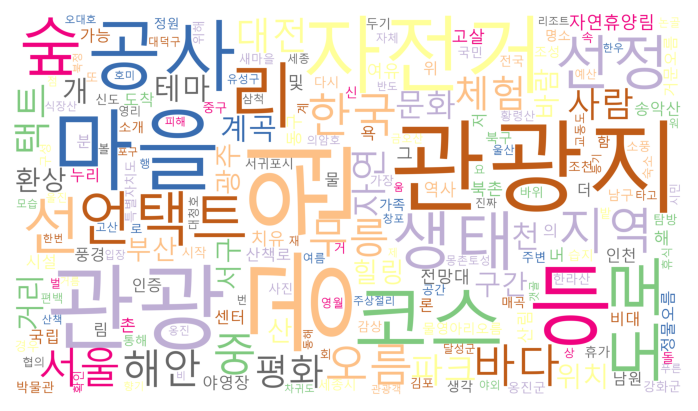

In [16]:
a.naver_blog(20)